In [53]:
import pandas as pd
pd.set_option('display.max_columns', 100)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

X = df_train.drop(['target', 'id'], axis=1)
y = df_train['target']

X_test = df_test.drop('id', axis=1)

In [54]:
X.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,I,AU,134e98eb8,be42001f3,6.8928,B,0.0,R,4.0,PS,1.0,PS,a,0f94eb834,T,I,9.0,0.4,1d2ee04de,3.0,be0264098,3.0,0.0,B,N,51.0,1d2ee04de,m,1.0
1,N,NaN,232792002,3aad93cab,6.8098,A,1.0,G,6.0,DT,10.0,DT,f,5859a8a06,T,N,12.0,0.5,e06abf51f,1.0,71fb03996,3.0,1.0,F,N,10.0,e06abf51f,k,1.0
2,P,JP,64e2a3589,90116a97d,6.7761,A,0.0,R,5.0,vq,0.0,vq,c,7d7c02c57,T,P,5.0,0.2,5d1ac7760,2.0,bf987f83f,3.0,0.0,C,S,16.0,5d1ac7760,c,0.0
3,K,IT,960cdb2ef,dc4ee566b,6.9302,A,0.0,R,5.0,Bx,1.0,Bx,a,165e81a00,F,K,2.0,0.4,b0ab8b134,3.0,d40fcead7,2.0,0.0,D,N,63.0,b0ab8b134,i,1.0
4,H,AU,8377590c9,f09cc205f,7.0238,A,1.0,G,5.0,kB,0.0,kB,d,35309e01b,T,H,8.0,0.6,0764632bc,6.0,NaN,2.0,1.0,A,S,26.0,0764632bc,h,1.0


The first note we can take is that the data is that we do not know what the different features are. 

At first glance, we can see that some of the features looks categorical (eg. f14 and f7)

Further, we see that there are some NaN values, which needs to be handeled

# EDA

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:>

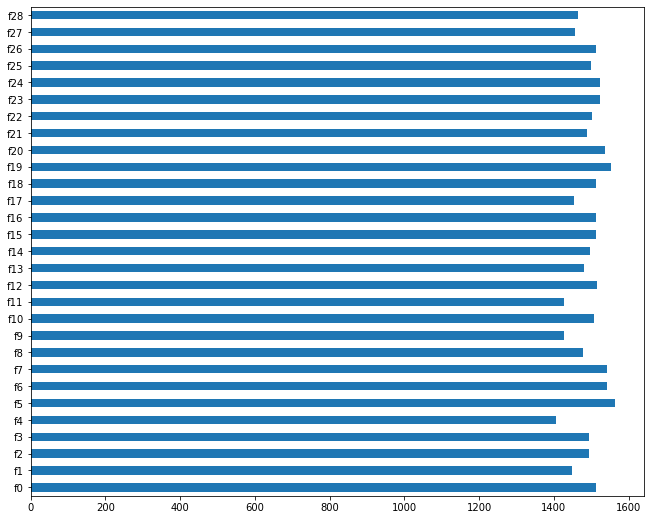

In [90]:
fig , ax = plt.subplots(figsize=(11,9))

X.isna().sum().plot(kind='barh')

We see that _all_ columns contains NaN values. This is a problem, as we only have 50000 rows to train our model on from the start. If we are to drop the NaN rows, we will be left with a pretty small dataset

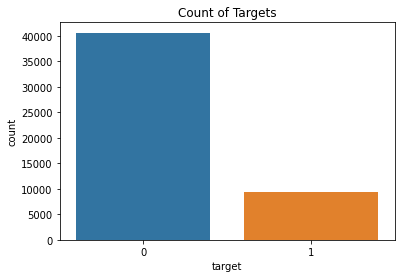

In [64]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='target', data=df_train)
plt.title("Count of Targets")
plt.show()

In [67]:
n = len(df_train)

class_0 = len(df_train[df_train['target'] == 0])
class_1 = len(df_train[df_train['target'] == 1])

print(f'Percent labeled 0: {class_0*100/n}')
print(f'Percent labeled 1: {class_1*100/n}')

Percent labeled 0: 81.272
Percent labeled 1: 18.728


We see that the majority of the class labels are 0, meaning we have to be carefull considering overfitting 

<AxesSubplot:>

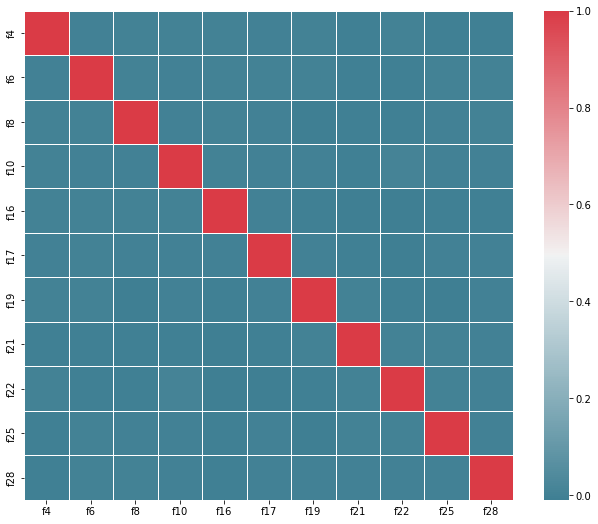

In [82]:
f, ax = plt.subplots(figsize=(11, 9))

corr = X.corr(method='pearson')

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), linewidths=.5, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Further, we see that there are no correlation between the numerical features.

Let's split the numerical and other features in two lists, so we can examine them separately

In [80]:
numerical_features = list(X.corr().columns)
other_features = list(set(X.columns) - set(numerical_features))

In [83]:
X[other_features].head()

,f15,f1,f11,f7,f5,f12,f24,f0,f2,f14,f23,f13,f3,f20,f27,f9,f26,f18
0,I,AU,PS,R,B,a,N,I,134e98eb8,T,B,0f94eb834,be42001f3,be0264098,m,PS,1d2ee04de,1d2ee04de
1,N,NaN,DT,G,A,f,N,N,232792002,T,F,5859a8a06,3aad93cab,71fb03996,k,DT,e06abf51f,e06abf51f
2,P,JP,vq,R,A,c,S,P,64e2a3589,T,C,7d7c02c57,90116a97d,bf987f83f,c,vq,5d1ac7760,5d1ac7760
3,K,IT,Bx,R,A,a,N,K,960cdb2ef,F,D,165e81a00,dc4ee566b,d40fcead7,i,Bx,b0ab8b134,b0ab8b134
4,H,AU,kB,G,A,d,S,H,8377590c9,T,A,35309e01b,f09cc205f,NaN,h,kB,0764632bc,0764632bc


KeyboardInterrupt: 

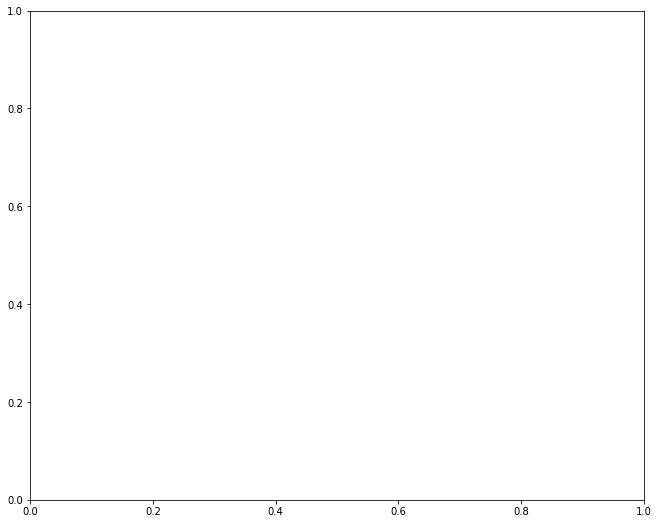

In [93]:
f, ax = plt.subplots(figsize=(11, 9))

corr = pd.get_dummies(X[other_features]).corr(method='pearson')

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), linewidths=.5, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [94]:
from scipy.stats import chi2_contingency

for i in range(len(other_features)):
    for j in range(i, len(other_features)):
        print(f'Chi {other_features[i]} vs {other_features[j]}:\nP-value:{chi2_contingency(pd.crosstab(X[other_features[i]], X[other_features[j]]))}')
        print()

Chi f15 vs f15:
P-value:(1212200.0, 0.0, 625, array([[198.4491833 , 132.17150635, 167.16560799,  89.37250454,
        115.21823956,  86.5576225 ,  18.23275862, 162.55943739,
        107.15744102,  11.70735027, 116.75362976,   9.27631579,
        173.24319419, 214.37885662, 132.29945554, 196.65789474,
        164.60662432, 180.28039927,  23.67059891, 163.51905626,
        176.25      ,  15.99364791,  44.84618875, 175.29038113,
        194.86660617,  31.47549909],
       [132.17150635,  88.02912061, 111.33595941,  59.52404719,
         76.73787329,  57.64927405,  12.14341693, 108.26814882,
         71.36920475,   7.79735192,  77.76047682,   6.17822967,
        115.38376506, 142.78101798,  88.11433757, 130.9784689 ,
        109.63162019, 120.0706979 ,  15.76513777, 108.90727603,
        117.38636364,  10.65212011,  29.86854479, 116.74723643,
        129.78543145,  20.96337238],
       [167.16560799, 111.33595941, 140.81358274,  75.28380218,
         97.05520954,  72.9126588 ,  15.35854232

Chi f15 vs f2:
P-value:(37436.98873586317, 0.4815544845876691, 37425, array([[0.12828472, 3.27126031, 4.04096862, ..., 0.06414236, 1.21870482,
        1.66770134],
       [0.08533889, 2.17614168, 2.68817501, ..., 0.04266944, 0.81071945,
        1.10940556],
       [0.1082575 , 2.76056637, 3.4101114 , ..., 0.05412875, 1.0284463 ,
        1.40734756],
       ...,
       [0.11272217, 2.87441534, 3.55074836, ..., 0.05636109, 1.07086062,
        1.46538821],
       [0.12518071, 3.19210817, 3.94319245, ..., 0.06259036, 1.18921677,
        1.62734926],
       [0.02036738, 0.51936814, 0.64157241, ..., 0.01018369, 0.19349009,
        0.26477592]]))

Chi f15 vs f14:
P-value:(31.853872587530855, 0.16228386393843217, 25, array([[ 276.33721103, 2719.66278897],
       [ 185.20865145, 1822.79134855],
       [ 233.53999277, 2298.46000723],
       [ 124.88671019, 1229.11328981],
       [ 161.68862849, 1591.31137151],
       [ 121.56623636, 1196.43376364],
       [  25.73367219,  253.26632781],
       [

Chi f1 vs f11:
P-value:(765.1747172678187, 0.4004706280839514, 756, array([[125.02543882,  79.46061223,  95.85283643,  59.17870771,
         67.23590265,  50.01017553,  13.61388112, 100.85385398,
         60.84571356,  70.01424574,   5.27885186,  95.85283643,
        211.70974307, 115.30123802,  96.96417366, 109.46671754,
         15.83655558,  95.85283643,  97.79767659,  10.27986941,
         31.11744255, 242.82718562, 126.13677605,  51.67718138,
         91.96315611,  13.61388112, 106.41054015,  72.79258882,
         86.96213856, 110.85588909,  20.83757314,  24.44941915,
         50.84367845,  99.18684813,  76.96010345,  85.0172984 ,
         59.45654202,  70.29208005,  81.6832867 ,  81.961121  ,
          5.55668617,  33.34011702, 117.24607818,   4.44534894,
        103.91003137,  66.68023404,  99.18684813,  13.89171542,
        111.68939201,  55.01119308, 103.63219707,  34.72928856,
         50.01017553,   7.50152633, 115.85690664,  89.74048164,
        102.52085983,  67.23590265, 

Chi f1 vs f2:
P-value:(5844.309079499113, 0.9121750752741001, 5992, array([[ 0.55518522, 13.602038  , 17.76592718, ...,  0.27759261,
         5.55185224,  7.21740792],
       [ 0.25704278,  6.29754803,  8.22536886, ...,  0.12852139,
         2.57042777,  3.3415561 ],
       [ 0.48521388, 11.88774015, 15.52684428, ...,  0.24260694,
         4.85213884,  6.30778049],
       [ 0.32527333,  7.96919648, 10.40874642, ...,  0.16263666,
         3.25273326,  4.22855323],
       [ 0.37728479,  9.24347734, 12.07311326, ...,  0.18864239,
         3.77284789,  4.90470226]]))

Chi f1 vs f14:
P-value:(5.5428803072176684, 0.23598590000475286, 4, array([[ 1208.11199117, 11873.88800883],
       [  557.88140488,  5483.11859512],
       [ 1054.72000085, 10366.27999915],
       [  708.31822139,  6961.68177861],
       [  819.96838171,  8059.03161829]]))

Chi f1 vs f23:
P-value:(17.127447172305132, 0.6446831313984185, 20, array([[2701.39039568,  607.47242104,  340.41798526, 2324.56852792,
        3405.8472

Chi f11 vs f12:
P-value:(934.3015639114366, 0.5916036738146214, 945, array([[109.32012655,  49.52948171,  64.82674056,  74.59657728,
         51.49478735,  95.23228656],
       [ 70.99666645,  32.16633756,  42.10096184,  48.44586704,
         33.44268212,  61.84748498],
       [ 85.49079559,  38.73316772,  50.6959679 ,  58.33619976,
         40.2700809 ,  74.47378814],
       ...,
       [ 36.60381765,  16.58402871,  21.70603223,  24.97728093,
         17.24207487,  31.88676561],
       [ 19.16173005,   8.68157207,  11.36288936,  13.07535512,
          9.02605261,  16.69240079],
       [ 42.49973459,  19.25528165,  25.20230588,  29.00046712,
         20.01932183,  37.02288893]]))

Chi f11 vs f24:
P-value:(176.35480924896467, 0.7359810628340184, 189, array([[324.26453791, 124.73546209],
       [207.26931488,  79.73068512],
       [246.26772255,  94.73227745],
       [155.99363071,  60.00636929],
       [172.60406361,  66.39593639],
       [136.49442687,  52.50557313],
       [ 33.943058

Chi f11 vs f2:
P-value:(283456.141275854, 0.2432451089712808, 282933, array([[0.0188475 , 0.48061127, 0.60312003, ..., 0.00942375, 0.18847501,
        0.24501751],
       [0.01222541, 0.31174785, 0.39121299, ..., 0.0061127 , 0.12225406,
        0.15893028],
       [0.01472992, 0.37561286, 0.47135732, ..., 0.00736496, 0.14729916,
        0.19148891],
       ...,
       [0.0062825 , 0.16020376, 0.20104001, ..., 0.00314125, 0.062825  ,
        0.0816725 ],
       [0.00339595, 0.08659663, 0.10867027, ..., 0.00169797, 0.03395946,
        0.0441473 ],
       [0.00730128, 0.18618274, 0.23364109, ..., 0.00365064, 0.07301284,
        0.09491669]]))

Chi f11 vs f14:
P-value:(228.20359778513833, 0.02708322087882511, 189, array([[4.15466237e+01, 4.06453376e+02],
       [2.61521158e+01, 2.55847884e+02],
       [3.18091337e+01, 3.11190866e+02],
       [1.99386698e+01, 1.95061330e+02],
       [2.26280718e+01, 2.21371928e+02],
       [1.75274819e+01, 1.71472518e+02],
       [4.72963796e+00, 4.62703620

Chi f11 vs f3:
P-value:(227470.33956419074, 0.6576803004864491, 227745, array([[0.10410389, 0.1892798 , 0.08517591, ..., 0.55837542, 0.64355133,
        0.41641557],
       [0.06629037, 0.12052795, 0.05423758, ..., 0.35555744, 0.40979502,
        0.26516148],
       [0.08076221, 0.14684039, 0.06607817, ..., 0.43317914, 0.49925731,
        0.32304885],
       ...,
       [0.0347791 , 0.06323473, 0.02845563, ..., 0.18654246, 0.21499809,
        0.13911641],
       [0.01773968, 0.03225396, 0.01451428, ..., 0.09514917, 0.10966346,
        0.07095871],
       [0.04038111, 0.07342019, 0.03303909, ..., 0.21658957, 0.24962866,
        0.16152442]]))

Chi f11 vs f20:
P-value:(407442.53763384465, 0.9730815665332782, 409185, array([[0.26916297, 0.17634815, 0.08353333, ..., 0.36197778, 0.21347408,
        0.28772593],
       [0.1780048 , 0.11662383, 0.05524287, ..., 0.23938577, 0.14117622,
        0.19028099],
       [0.21126521, 0.13841514, 0.06556507, ..., 0.28411529, 0.16755517,
        0.22583

Chi f7 vs f20:
P-value:(4265.318167971114, 0.7202564808768162, 4320, array([[ 2.63916977,  1.72911123,  0.72804683, ...,  3.64023417,
         2.1841405 ,  2.82118148],
       [10.27578499,  6.73241086,  2.83469931, ..., 14.17349654,
         8.50409792, 10.98445982],
       [16.08504524, 10.53847791,  4.43725386, ..., 22.18626929,
        13.31176158, 17.1943587 ]]))

Chi f7 vs f27:
P-value:(27.659131971590504, 0.48261623570129497, 28, array([[ 483.55672206,  332.61095762,  418.36936286,  224.17868832,
         285.34326518,  215.9502699 ,   46.26199685,  413.1580312 ,
         258.18948442,   24.04526714,  287.72036384,   23.03957156,
         435.83189527,  519.12177498,  334.62234879],
       [1870.83172525, 1286.83793089, 1618.62846942,  867.32452076,
        1103.96404131,  835.48960768,  178.98295575, 1598.4663578 ,
         998.90882815,   93.02869044, 1113.16079398,   89.13775662,
        1686.1892294 , 2008.429294  , 1294.61979853],
       [2934.61155268, 2018.55111149, 2539.

Chi f5 vs f2:
P-value:(1497.041658880229, 0.49483563538402114, 1497, array([[ 0.81421184, 40.71059184, 53.73798123, ...,  0.81421184,
        16.28423674, 21.16950776],
       [ 0.18578816,  9.28940816, 12.26201877, ...,  0.18578816,
         3.71576326,  4.83049224]]))

Chi f5 vs f14:
P-value:(2.3676073753838525, 0.1238767836456185, 1, array([[ 3539.84683822, 34684.15316178],
       [  811.15316178,  7947.84683822]]))

Chi f5 vs f23:
P-value:(11.270120847539093, 0.04627965297776388, 5, array([[ 7861.4841601 ,  1773.49352778,   984.82201405,  6808.29433681,
         9962.98039174, 10837.92556951],
       [ 1797.5158399 ,   405.50647222,   225.17798595,  1556.70566319,
         2278.01960826,  2478.07443049]]))

Chi f5 vs f13:
P-value:(196.0019569941314, 0.8859087111218009, 221, array([[239.2390356 , 113.92335029,  30.108314  , 196.92464835,
        287.24959036, 226.21922414, 258.76875279, 154.6102611 ,
        190.41474262,   9.7648586 ,  40.68691082, 267.71987317,
        214.0131508

Chi f12 vs f2:
P-value:(7535.307928824916, 0.35387300072635874, 7490, array([[ 0.49283436, 12.07444185, 16.01711673, ...,  0.24641718,
         4.92834361,  6.16042951],
       [ 0.22211354,  5.44178184,  7.2186902 , ...,  0.11105677,
         2.22113545,  2.77641931],
       [ 0.29202637,  7.15464597,  9.4908569 , ...,  0.14601318,
         2.92026366,  3.65032958],
       [ 0.33459494,  8.19757602, 10.87433553, ...,  0.16729747,
         3.34594939,  4.18243674],
       [ 0.23129917,  5.66682968,  7.51722305, ...,  0.11564959,
         2.31299171,  2.89123963],
       [ 0.42713162, 10.46472464, 13.88177759, ...,  0.21356581,
         4.27131618,  5.33914523]]))

Chi f12 vs f14:
P-value:(4.179213498019183, 0.5239128376563073, 5, array([[ 1070.39002914, 10493.60997086],
       [  482.89733501,  4734.10266499],
       [  635.06969819,  6225.93030181],
       [  731.51957802,  7171.48042198],
       [  502.24284833,  4923.75715167],
       [  929.8805113 ,  9116.1194887 ]]))

Chi f12 vs 

Chi f24 vs f2:
P-value:(1425.5748061375034, 0.9056560071338781, 1497, array([[ 0.72206748, 36.82544171, 45.49025153, ...,  0.72206748,
        13.71928221, 18.05168711],
       [ 0.27793252, 14.17455829, 17.50974847, ...,  0.27793252,
         5.28071779,  6.94831289]]))

Chi f24 vs f14:
P-value:(1.5272427136267632, 0.21652673640219436, 1, array([[ 3153.31439023, 30820.68560977],
       [ 1210.68560977, 11833.31439023]]))

Chi f24 vs f23:
P-value:(2.6215985310038117, 0.7580809620991953, 5, array([[6980.63516245, 1566.34413498,  880.7073342 , 6045.01908551,
        8845.36496521, 9637.92931765],
       [2681.36483755,  601.65586502,  338.2926658 , 2321.98091449,
        3397.63503479, 3702.07068235]]))

Chi f24 vs f13:
P-value:(224.064495012956, 0.429842426282512, 221, array([[210.92578814,  96.794711  ,  26.72689781, 174.80835867,
        257.87844646, 197.20116494, 227.5398057 , 140.13562637,
        170.47426713,   8.66818307,  36.11742948, 235.48564019,
        192.14472481, 290.384

Chi f0 vs f2:
P-value:(37436.98873586317, 0.4815544845876691, 37425, array([[0.12828472, 3.27126031, 4.04096862, ..., 0.06414236, 1.21870482,
        1.66770134],
       [0.08533889, 2.17614168, 2.68817501, ..., 0.04266944, 0.81071945,
        1.10940556],
       [0.1082575 , 2.76056637, 3.4101114 , ..., 0.05412875, 1.0284463 ,
        1.40734756],
       ...,
       [0.11272217, 2.87441534, 3.55074836, ..., 0.05636109, 1.07086062,
        1.46538821],
       [0.12518071, 3.19210817, 3.94319245, ..., 0.06259036, 1.18921677,
        1.62734926],
       [0.02036738, 0.51936814, 0.64157241, ..., 0.01018369, 0.19349009,
        0.26477592]]))

Chi f0 vs f14:
P-value:(31.853872587530855, 0.16228386393843217, 25, array([[ 276.33721103, 2719.66278897],
       [ 185.20865145, 1822.79134855],
       [ 233.53999277, 2298.46000723],
       [ 124.88671019, 1229.11328981],
       [ 161.68862849, 1591.31137151],
       [ 121.56623636, 1196.43376364],
       [  25.73367219,  253.26632781],
       [ 2

Chi f2 vs f2:
P-value:(72661987.99999997, 0.0, 2244004, array([[8.24640251e-05, 2.10283264e-03, 2.72131283e-03, ...,
        4.12320125e-05, 8.24640251e-04, 1.07203233e-03],
       [2.10283264e-03, 5.36222323e-02, 6.93934771e-02, ...,
        1.05141632e-03, 2.10283264e-02, 2.73368243e-02],
       [2.72131283e-03, 6.93934771e-02, 8.98033233e-02, ...,
        1.36065641e-03, 2.72131283e-02, 3.53770668e-02],
       ...,
       [4.12320125e-05, 1.05141632e-03, 1.36065641e-03, ...,
        2.06160063e-05, 4.12320125e-04, 5.36016163e-04],
       [8.24640251e-04, 2.10283264e-02, 2.72131283e-02, ...,
        4.12320125e-04, 8.24640251e-03, 1.07203233e-02],
       [1.07203233e-03, 2.73368243e-02, 3.53770668e-02, ...,
        5.36016163e-04, 1.07203233e-02, 1.39364202e-02]]))

Chi f2 vs f14:
P-value:(1503.0198941264912, 0.45142939726409576, 1497, array([[ 0.18499788,  1.81500212],
       [ 4.439949  , 43.560051  ],
       [ 5.73493413, 56.26506587],
       ...,
       [ 0.09249894,  0.90750106]

Chi f14 vs f20:
P-value:(2129.9405823237466, 0.6897242081293168, 2163, array([[ 2.41261062,  1.76306161,  0.83513445, ...,  3.61891593,
         2.13423247,  2.8765742 ],
       [23.58738938, 17.23693839,  8.16486555, ..., 35.38108407,
        20.86576753, 28.1234258 ]]))

Chi f14 vs f27:
P-value:(12.082812549449837, 0.59965229214615, 14, array([[ 486.89677433,  336.21269457,  427.12356926,  228.06489563,
         288.85748869,  218.51971714,   47.07719097,  419.7098384 ,
         262.35340086,   24.46531184,  295.3445032 ,   23.81661039,
         442.13637425,  524.24344355,  339.17818691],
       [4767.10322567, 3291.78730543, 4181.87643074, 2232.93510437,
        2828.14251131, 2139.48028286,  460.92280903, 4109.2901616 ,
        2568.64659914,  239.53468816, 2891.6554968 ,  233.18338961,
        4328.86362575, 5132.75655645, 3320.82181309]]))

Chi f14 vs f9:
P-value:(228.2035977851383, 0.027083220878825216, 189, array([[4.15466237e+01, 2.61521158e+01, 3.18091337e+01, 1.99386698e+01

Chi f23 vs f3:
P-value:(6013.43533017759, 0.5214419114520787, 6020, array([[ 2.06001191,  4.12002382,  1.85401072, ..., 11.53606669,
        14.21408217,  8.44604883],
       [ 0.46274243,  0.92548486,  0.41646819, ...,  2.5913576 ,
         3.19292276,  1.89724396],
       [ 0.25795339,  0.51590677,  0.23215805, ...,  1.44453896,
         1.77987836,  1.05760888],
       [ 1.78100544,  3.56201089,  1.6029049 , ...,  9.97363049,
        12.28893756,  7.30212232],
       [ 2.6112198 ,  5.22243961,  2.35009782, ..., 14.62283089,
        18.01741664, 10.70600119],
       [ 2.82706703,  5.65413406,  2.54436033, ..., 15.83157537,
        19.5067625 , 11.59097482]]))

Chi f23 vs f20:
P-value:(10737.00742438811, 0.7353719181026143, 10830, array([[ 5.96209186,  3.90619812,  1.85030437, ...,  8.22357499,
         4.93414499,  6.16768124],
       [ 1.34130092,  0.87878336,  0.4162658 , ...,  1.85007024,
         1.11004214,  1.38755268],
       [ 0.75614065,  0.49540249,  0.23466434, ...,  1.042

Chi f13 vs f26:
P-value:(48991.5127543421, 0.3144711769934913, 48841, array([[1.38684177, 1.44383527, 2.2227464 , ..., 1.46916571, 1.62748098,
        0.39262187],
       [0.64222874, 0.6686217 , 1.02932551, ..., 0.68035191, 0.75366569,
        0.18181818],
       [0.17684559, 0.18411322, 0.28343746, ..., 0.18734328, 0.20753113,
        0.05006588],
       ...,
       [0.48399847, 0.50388882, 0.77572358, ..., 0.51272897, 0.56797994,
        0.1370224 ],
       [1.90341706, 1.98163968, 3.05068214, ..., 2.01640529, 2.23369034,
        0.53886693],
       [0.54449828, 0.56687492, 0.87268902, ..., 0.57682009, 0.63897743,
        0.1541502 ]]))

Chi f13 vs f18:
P-value:(48991.38211592505, 0.31461926613328756, 48841, array([[1.3868123 , 1.44380459, 2.22269916, ..., 1.46913449, 1.6274464 ,
        0.39261353],
       [0.64221509, 0.66860749, 1.02930364, ..., 0.68033745, 0.75364967,
        0.18181432],
       [0.17684184, 0.18410931, 0.28343144, ..., 0.1873393 , 0.20752672,
        0.05006481

Chi f9 vs f26:
P-value:(42553.66408789307, 0.0034637321480031676, 41769, array([[2.07831939, 2.21117999, 3.29304488, ..., 2.23016008, 2.46741115,
        0.60736274],
       [1.32510297, 1.40981275, 2.09959237, ..., 1.42191414, 1.57318161,
        0.3872447 ],
       [1.56687614, 1.66704174, 2.48267589, ..., 1.68135111, 1.86021825,
        0.45789988],
       ...,
       [0.69277313, 0.73706   , 1.09768163, ..., 0.74338669, 0.82247038,
        0.20245425],
       [0.36265976, 0.38584349, 0.57462528, ..., 0.38915545, 0.43055497,
        0.10598276],
       [0.81365972, 0.86567449, 1.28922339, ..., 0.87310518, 0.96598871,
        0.23778184]]))

Chi f9 vs f18:
P-value:(42554.10617407551, 0.003448034504174313, 41769, array([[2.07827527, 2.21113305, 3.29297497, ..., 2.23011273, 2.46735877,
        0.60734985],
       [1.32507484, 1.40978282, 2.0995478 , ..., 1.42188396, 1.57314821,
        0.38723648],
       [1.56684288, 1.66700635, 2.48262319, ..., 1.68131542, 1.86017876,
        0.45789

In [ ]:
hex_columns = ['f2', 'f3', 'f13', 'f18', 'f20', 'f26']
ordinal_columns = ['f6', 'f4', 'f8', 'f16', 'f17', 'f19', 'f21', 'f25']
categorical_columns = ['f1', 'f5', 'f7', 'f9', 'f11', 'f24']
ordinal_cat_columns = ['f0', 'f12', 'f23', 'f27']
binary_columns = ['f10', 'f28', 'f22', 'f14']
all_columns = ['f' + str(i) for i in range(0, 29)]
removed_cols = []

In [4]:
def conv_hex(df: pd.DataFrame) -> None:
    def conv_hex_map(x):
        try:
            return int(x, 16)
        except ValueError as e:
            return np.nan
        except TypeError as e:
            return np.nan

    for col in hex_columns:
        if col not in list(df.columns):
            continue
        col_loc = list(df.columns).index(col)
        df[col] = df[col].apply(lambda x: conv_hex_map(x))


def conv_bool(df: pd.DataFrame):
    def conv_bool_map(x):
        try:
            if not type(x) == str:
                return x
            if x.lower() == 'f':
                return 0
            elif x.lower() == 't':
                return 1
            return x
        except Exception as e:
            return np.nan
    df['f14'] = df['f14'].apply(lambda x: conv_bool_map(x))


def conv_binary(df: pd.DataFrame):
    def binaryToDecimal(binary):
        try:
            binary = int(binary)
        except:
            return np.nan

        binary1 = binary
        decimal, i, n = 0, 0, 0
        while(binary != 0):
            dec = binary % 10
            decimal = decimal + dec * pow(2, i)
            binary = binary//10
            i += 1
        return decimal
    for col in binary_columns:
        if col not in list(df.columns):
            continue
    df[col] = df[col].apply(lambda x: binaryToDecimal(x))
    
def remove_duplicate_columns(df: pd.DataFrame) -> None:
    cols_to_drop = []
    cols = list(df.columns)
    for col in df.columns:
        if col in cols:
            cols.remove(col)
        for col2 in cols:
            if df[col].equals(df[col2]):
                cols_to_drop.append(col2)

    df.drop(columns=cols_to_drop, inplace=True)

def transform_categorical(df: pd.DataFrame, test=False) -> None:
    cols = list(set(df.columns).intersection(set(categorical_columns).union(set(ordinal_cat_columns))))
    for col in cols:
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

def remove_duplicates(df: pd.DataFrame) -> None:
    df.drop_duplicates(inplace=True)
    
def conv_columns(df: pd.DataFrame, test=False) -> None:
    conv_hex(df)
    conv_bool(df)
    conv_binary(df)
    return transform_categorical(df, test)

In [ ]:
def run_mice():
    infile = 'train_processed.csv'
    outfile = 'train_imputed.csv'
    # np.savetxt(infile, data.to_numpy().tolist(), delimiter=",")
    os.system(f'type nul > {outfile}')
    os.system('"C:\Program Files\R\R-4.1.1\bin\Rscript.exe" --vanilla run_mice.R %s %s' % (infile, outfile))
    data_imputed = pd.read_csv(outfile)

In [ ]:
def preprocess(df, test=False):
    if test:
        df.loc[26648, 'f9'] = np.nan
        df.loc[20956, 'f15'] = np.nan
        df.loc[21034, 'f15'] = np.nan
        
    remove_duplicate_columns(df)
    remove_duplicates(df)

    conv_columns(df, test)
    
    if test:
        df.to_csv('./test_processed.csv', index=False)
    else:
        df.to_csv('./train_processed.csv', index=False)

In [ ]:
# preprocess(df_train)
preprocess(df_test, True)

In [ ]:
run_mice()

In [ ]:
round(100*(X_test_pre.isnull().sum()/len(X_test_pre.index)),2)

In [ ]:
from imblearn.over_sampling import SMOTE

for col in X_train_pre:
    if X_train_pre[col].isnull().sum() > 0:
        X_train_pre[col].fillna(X_train_pre[col].mean(), inplace=True)

sm = SMOTE(sampling_strategy='minority', random_state=7)
X_cols = X_train_pre.columns

X_train_pre, y_train_pre = sm.fit_resample(X_train_pre, y_train)

X_train = pd.DataFrame(X_train, columns=X_cols)

y_train.value_counts()

In [ ]:
X_test.head()

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def split(X : pd.DataFrame, y : pd.DataFrame, size=.2):
    return train_test_split(X, y, test_size=size, stratify=y)

def fit(data : pd.DataFrame, labels : pd.DataFrame, classifier : any, eval_pool = None) -> None:
    if eval_pool is not None:
        classifier.fit(data, labels, eval_set=eval_pool)
    else:
        classifier.fit(data, labels)

def predict_proba(classifier : any, test : pd.DataFrame) -> np.array:
    return classifier.predict_proba(test)

def predict(classifier : any, test : pd.DataFrame) -> np.array:
    return classifier.predict(test)

def print_accuracy(pred : np.array, test : pd.DataFrame, name : str):
    print(name + ' Model accuracy score: {0:0.4f}'.format(roc_auc_score(test, pred[:, 1])))

In [39]:
imp_data = pd.read_csv('train_imputed_f9_split.csv')

X_train_pre = imp_data.drop(['target', 'id'], axis=1)
y_train = imp_data['target']

df_test = pd.read_csv('test_imputed_f9_split.csv')
X_test_pre = df_test.drop('id', axis=1)

train_cat = list(set(X_train_split.columns).intersection(set(categorical_columns)))

for col in X_train_pre:
    if X_train_pre[col].isnull().sum() > 0:
        X_train_pre[col].fillna(method='bfill', inplace=True)
    
    # if col in train_cat:
        # X_train_pre[col] = X_train_pre[col].astype('category')
        
for col in X_test_pre:
    if X_test_pre[col].isnull().sum() > 0:
        X_test_pre[col].fillna(method='bfill', inplace=True)
    
    # if col in train_cat:
        # X_train_pre[col] = X_train_pre[col].astype('category')
        
remove_duplicate_columns(X_train_pre)
remove_duplicate_columns(X_test_pre)

# scaler = StandardScaler()

# cols_to_transform = list(set(X_train_pre.columns) - set(train_cat))

# X_train_pre[cols_to_transform] = scaler.fit_transform(X_train_pre[cols_to_transform], y_train)
# X_test_pre[cols_to_transform] = scaler.transform(X_test_pre[cols_to_transform])

X_train_split, X_test_split, y_train_split, y_test_split = split(X_train_pre, y_train, size=.2)
        
# X_train_pre.head()

In [ ]:
from catboost import CatBoostClassifier, Pool

train_cat = list(set(X_train_split.columns).intersection(set(categorical_columns)))
test_cat = list(set(X_test_split.columns).intersection(set(categorical_columns)))
cats = []
for col in train_cat:
    cats.append(X_train_pre.columns.get_loc(col))
    
print(cats)
print(train_cat)
print(test_cat)

train_dataset = Pool(X_train_split ,y_train_split, cat_features=train_cat)
test_dataset = Pool(X_test_split, y_test_split, cat_features=test_cat)

model = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC')

eval_pool = Pool(X_test_split, y_test_split, cat_features=cats)

# clf = CatBoostClassifier(loss_function='Logloss',cat_features=cats,eval_metric= 'AUC',depth= 1,learning_rate= 1,l2_leaf_reg= 5,iterations= 2000)

clf = CatBoostClassifier(depth=1, learning_rate=1, iterations=2000, stratified=True)

fit(X_train_pre, y_train, clf, eval_pool)

In [ ]:
grid = {'learning_rate': [0.03, 0.1, 1],
        'depth': [1, 2, 4, 6, 10],
        'l2_leaf_reg': [1, 3, 5],
        'iterations': [50, 100, 150, 500, 1000, 2000]}

model.grid_search(grid,train_dataset, verbose=False)

In [ ]:
model.get_params()

In [ ]:
from xgboost import XGBClassifier

clf = XGBClassifier(max_depth=6, eta=.125, objective='binary:logistic', use_label_encoder=False)

fit(X_train_split, y_train_split, clf)

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
fit(X_train_split, y_train_split, clf)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier

clf = AdaBoostClassifier(n_estimators=1000)
fit(X_train_split, y_train_split, clf)

In [ ]:
X_train_pre.loc[~(X_train_pre['f18'] == X_train_pre['f26'])]

In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from catboost import CatBoostClassifier
models['Catboost'] = CatBoostClassifier(iterations=2000, depth=1, learning_rate=1, verbose=False)

from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

from lightgbm import LGBMClassifier
models['Light GBM'] = LGBMClassifier()

from sklearn.ensemble import GradientBoostingClassifier
models['GBM'] = GradientBoostingClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall, auc = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_split, y_train_split)
    
    # Prediction 
    predictions = models[key].predict_proba(X_test_split )
    
    # Calculate AUC
    auc[key] = roc_auc_score(y_test_split, predictions[:, 1])
    

df_model = pd.DataFrame(index=models.keys(), columns=['Auc'])
df_model['Auc'] = auc.values()

df_model

In [7]:
%%time

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

models = {}
# models['rf'] = RandomForestClassifier(random_state=42)
# models['Catboost'] = CatBoostClassifier(boosting_type='Plain', gpu_cat_features_storage = 'CpuPinnedMemory', max_ctr_complexity=1, iterations=1000, depth=1, learning_rate=1, verbose=False, random_state=42, task_type="GPU", devices='0:1')
models['lgbm'] = LGBMClassifier(random_state=42, device='gpu')
# models['gbm'] = GradientBoostingClassifier(min_samples_split=500,min_samples_leaf=50,max_depth=8, subsample=0.8, random_state=42)
# models['xgb'] = XGBClassifier(tree_method='gpu_hist', gpu_id=0, verbosity = 0)
clf = StackingClassifier(estimators = list(models.items()), final_estimator=LogisticRegression(), cv=10)

params = {# 'rf__n_estimators': [5, 10, 100], 
          'lgbm__max_depth': [6,7], 
          'lgbm__num_leaves': [70, 80], 
          # 'gbm__n_estimators': range(20,81,10), 
          # 'gbm__learning_rate': [1, .1, .01]
 #            'xgb__max_depth': [5, 10, 20],
 #            'xgb__n_estimators': [10, 100, 1000],
 #            'xgb__learning_rate': [1, .1, .01]
        }

# grid = GridSearchCV(estimator=clf, param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc', refit=True, verbose=100)
grid = RandomizedSearchCV(estimator=clf, param_distributions=params, n_iter=10, cv=5, n_jobs=-1, scoring='roc_auc', refit=True, verbose=10)
grid.fit(X_train_pre, y_train)

C:\Users\sanderlindberg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Wall time: 3min 35s


RandomizedSearchCV(cv=5,
                   estimator=StackingClassifier(cv=10,
                                                estimators=[('lgbm',
                                                             LGBMClassifier(device='gpu',
                                                                            random_state=42))],
                                                final_estimator=LogisticRegression()),
                   n_jobs=-1,
                   param_distributions={'lgbm__max_depth': [6, 7],
                                        'lgbm__num_leaves': [70, 80]},
                   scoring='roc_auc', verbose=10)

In [7]:
%%time


from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


models = {}
models['rf'] = RandomForestClassifier(random_state=42)
models['Catboost'] = CatBoostClassifier(boosting_type='Plain', gpu_cat_features_storage = 'CpuPinnedMemory', max_ctr_complexity=1, iterations=1000, depth=1, learning_rate=1, verbose=False, random_state=42, task_type="GPU", devices='0:1')
models['lgbm'] = LGBMClassifier(random_state=42, device='gpu')
models['gbm'] = GradientBoostingClassifier(min_samples_split=500,min_samples_leaf=50,max_depth=8, subsample=0.8, random_state=42)
models['xgb'] = XGBClassifier(tree_method='gpu_hist', gpu_id=0, verbosity = 0, objective='binary:logistic', silent=True)


# clf = StackingClassifier(estimators = list(models.items()), final_estimator=LogisticRegression(), cv=10)




Wall time: 161 ms


In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def grid(estimator, params, n_jobs=-1):
    grid_cv = GridSearchCV(estimator=estimator, param_grid=params, cv=5, n_jobs=n_jobs, scoring='roc_auc', refit=True, verbose=10)
    grid_cv.fit(X_train_pre, y_train)
    return grid_cv

In [11]:
%%time
lgbm_params = {
        'learning_rate': [1],
        'n_estimators': [24, 32, 52],
        'num_leaves': [16], # large num_leaves helps improve accuracy but might lead to over-fitting
        'boosting_type' : ['dart'], # for better accuracy -> try dart
        'objective' : ['binary'],
        'max_bin':[255], # large max_bin helps improve accuracy but might slow down training progress
        'colsample_bytree' : [0.64],
        'subsample' : [0.7],
}

lgbm_grid = grid(models['lgbm'], lgbm_params)
print(f'Best params lgbm: {lgbm_grid.best_params_}')
print(f'Best score lgbm: {lgbm_grid.best_score_}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params lgbm: {'boosting_type': 'dart', 'colsample_bytree': 0.64, 'learning_rate': 1, 'max_bin': 255, 'n_estimators': 32, 'num_leaves': 16, 'objective': 'binary', 'subsample': 0.7}
Best score lgbm: 0.7322889897844772
Wall time: 3.15 s


In [19]:
%%time
cat_params = {'iterations': [500, 1000, 2000],
              'depth': [1, 4, 5, 6],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'l2_leaf_reg': np.logspace(-20, -19, 3),
              'leaf_estimation_iterations': [10],
}

cat_grid = grid(models['Catboost'], cat_params, 2)
print(f'Best params lgbm: {cat_grid.best_params_}')
print(f'Best score lgbm: {cat_grid.best_score_}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params lgbm: {'depth': 1, 'iterations': 2000, 'l2_leaf_reg': 1e-20, 'leaf_estimation_iterations': 10, 'loss_function': 'CrossEntropy'}
Best score lgbm: 0.7598584828689188
Wall time: 1h 19min 39s


In [38]:
%%time
xgb_params = {'min_child_weight': [1, 5, 10],
                'gamma': [0.5, 1, 1.5, 2, 5],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'max_depth': [3, 4, 5],
              'n_estimators': [500, 1000],
              'learning_rate': [1, .1, .01],
}

xgb_grid = grid(models['xgb'], xgb_params)
print(f'Best params xgb: {xgb_grid.best_params_}')
print(f'Best score xgb: {xgb_grid.best_score_}')

Fitting 5 folds for each of 4860 candidates, totalling 24300 fits


C:\Users\sanderlindberg\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Best params xgb: {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 1000, 'subsample': 1.0}
Best score xgb: 0.7562589989045685
Wall time: 8h 30min 29s


In [41]:
%%time

from sklearn.ensemble import AdaBoostClassifier

models['ada'] = AdaBoostClassifier()
ada_params = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1, 1]}

ada_grid = grid(models['ada'], ada_params)
print(f'Best params ada: {ada_grid.best_params_}')
print(f'Best score ada: {ada_grid.best_score_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params ada: {'learning_rate': 1, 'n_estimators': 2000}
Best score ada: 0.7603071583348466
Wall time: 9min 17s


In [44]:
%%time

from sklearn.ensemble import RandomForestClassifier

models['rf'] = RandomForestClassifier()
rf_params = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = grid(models['rf'], rf_params)
print(f'Best params rf: {rf_grid.best_params_}')
print(f'Best score rf: {rf_grid.best_score_}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best params rf: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}
Best score rf: 0.7308434896991447
Wall time: 16min 30s


In [33]:
cat_clf_params = {
    'depth': 1, 
    'iterations': 2000, 
    'l2_leaf_reg': 1e-20, 
    'leaf_estimation_iterations': 10, 
    'loss_function': 'CrossEntropy',
    'boosting_type': 'Plain', 
    'gpu_cat_features_storage': 'CpuPinnedMemory',
    'max_ctr_complexity':1,
    'iterations':1000,
    'depth':1, 
    'learning_rate':1, 
    'verbose':False, 
    'random_state':42, 
    'task_type':"GPU", 
    'devices':'0:1'
}

lgbm_clf_params = {
    'boosting_type': 'dart', 
    'colsample_bytree': 0.64, 
    'learning_rate': 1, 
    'max_bin': 255, 
    'n_estimators': 32, 
    'num_leaves': 16, 
    'objective': 'binary', 
    'subsample': 0.7,
    'random_state':42, 
    'device':'gpu'
}

stacking_models = {}

stacking_models['cat'] = CatBoostClassifier(**cat_clf_params)
stacking_models['lgbm'] = LGBMClassifier(**lgbm_clf_params)

clf = StackingClassifier(estimators = list(stacking_models.items()), final_estimator=LogisticRegression(), cv=10)
fit(X_train_pre, y_train, clf)

In [8]:
grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__cv': 10,
 'estimator__estimators': [('lgbm',
   LGBMClassifier(device='gpu', random_state=42))],
 'estimator__final_estimator__C': 1.0,
 'estimator__final_estimator__class_weight': None,
 'estimator__final_estimator__dual': False,
 'estimator__final_estimator__fit_intercept': True,
 'estimator__final_estimator__intercept_scaling': 1,
 'estimator__final_estimator__l1_ratio': None,
 'estimator__final_estimator__max_iter': 100,
 'estimator__final_estimator__multi_class': 'auto',
 'estimator__final_estimator__n_jobs': None,
 'estimator__final_estimator__penalty': 'l2',
 'estimator__final_estimator__random_state': None,
 'estimator__final_estimator__solver': 'lbfgs',
 'estimator__final_estimator__tol': 0.0001,
 'estimator__final_estimator__verbose': 0,
 'estimator__final_estimator__warm_start': False,
 'estimator__final_estimator': LogisticRegression(),
 'estimator__n_jobs': None,
 'estimator__passthrough': False,
 'estimator__stack_method': 'auto

In [34]:
prediction = predict_proba(clf, X_test_split)

print_accuracy(prediction, y_test_split, 'stack')


real_pred = predict_proba(clf, X_test_pre)

f = open("./pred.csv", "w")
f.write("id,target\n")
id_nr = 50000
for v in real_pred[:, 1]:
    f.write(f"{id_nr},{v}\n")
    id_nr += 1
f.close()

stack Model accuracy score: 0.7689


In [ ]:
X_train.head()

In [ ]:
from catboost import Pool, cv

cv_dataset = Pool(data=X_train_pre,
                  label=y_train,
                  cat_features=list(set(X_train_pre.columns).intersection(set(categorical_columns))))

params = {"iterations": 2000,
          "depth": 2,
          "learning_rate": 1,
          "loss_function": "Logloss",
          "verbose": False,
          "roc_file": "roc-file"}

scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")

In [ ]:
scores